## Time Resampling

Resampling involves changing the frequency of your time series observations. 

Two types of resampling are: 

- Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds 
- Downsampling: Where you decrease the frequency of the samples, such as from days to months

In [22]:
import pandas as pd

In [23]:
# parse_dates = True will change string values into datetime values

df = pd.read_csv("./data/section_6/starbucks.csv", index_col="Date", parse_dates=True)

In [24]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [25]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## Resample Method

The rule parameter describes the frequency with which to apply the aggregation function (e.g., daily, monthly, yearly).

See table for rule codes: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

The aggregation function is needed to join the rows for resampling (e.g., mean, sum, count).

In [26]:
# this example will resample the dataset from daily to yearly datapoints, 
# with mean aggregation (average closing price per year)

df.resample(rule="A").mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [27]:
# create our own custom resampling aggregation

def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [28]:
# using our own resampling function, it returns the first closing price for each year

df.resample(rule="A").apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [29]:
# the table below shows 38.0061 was the closing price for 2015-01-02, with is the same value for our resampling data
# that said, in this example, it is misleading because the closing dates don't match (2015-12-31 vs. 2015-01-02)

df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [30]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


<AxesSubplot:xlabel='Date'>

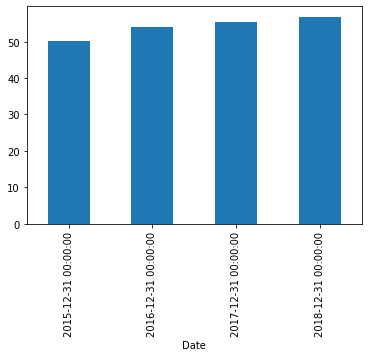

In [31]:
df["Close"].resample(rule="A").mean().plot.bar()